In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market.csv')
df.dropna(subset=['SubClassification'],inplace=True)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


<ipython-input-3-1a9907ba3299>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


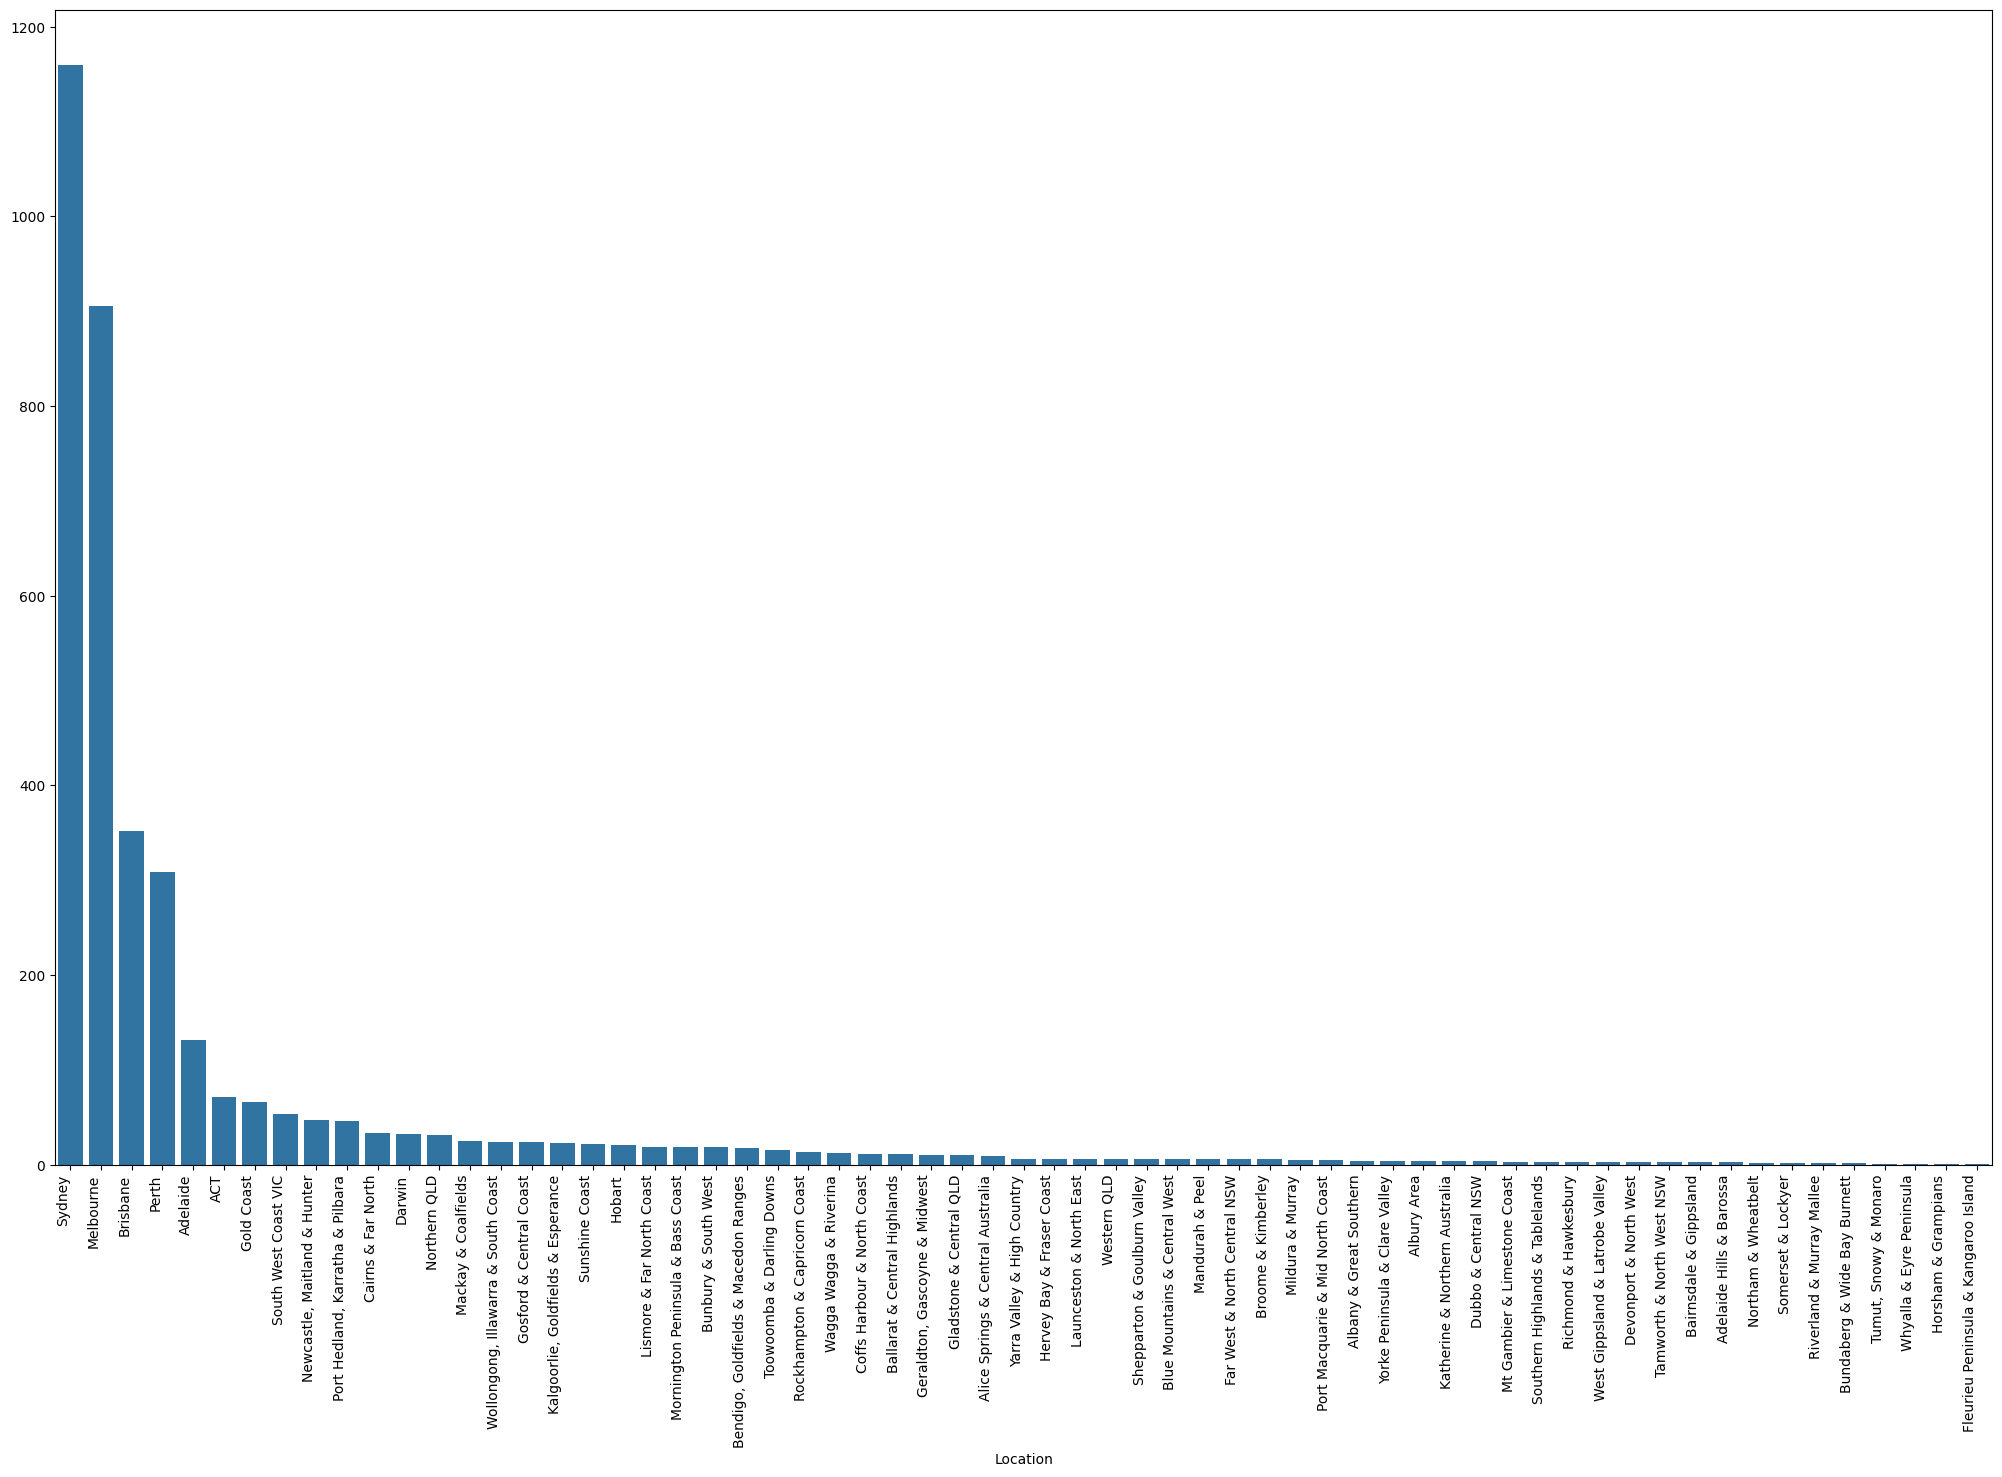

In [3]:
%matplotlib inline
bar = df['Location'].value_counts()
plt.figure(figsize=(25,15))
ax = sns.barplot(x=bar.index, y=bar.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [4]:
import matplotlib
#create dataframe for salary ranges
df['SalaryRange'] = (df['HighestSalary']-df['LowestSalary'])
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN,30.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN,30.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN,30.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN,30.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN,30.0


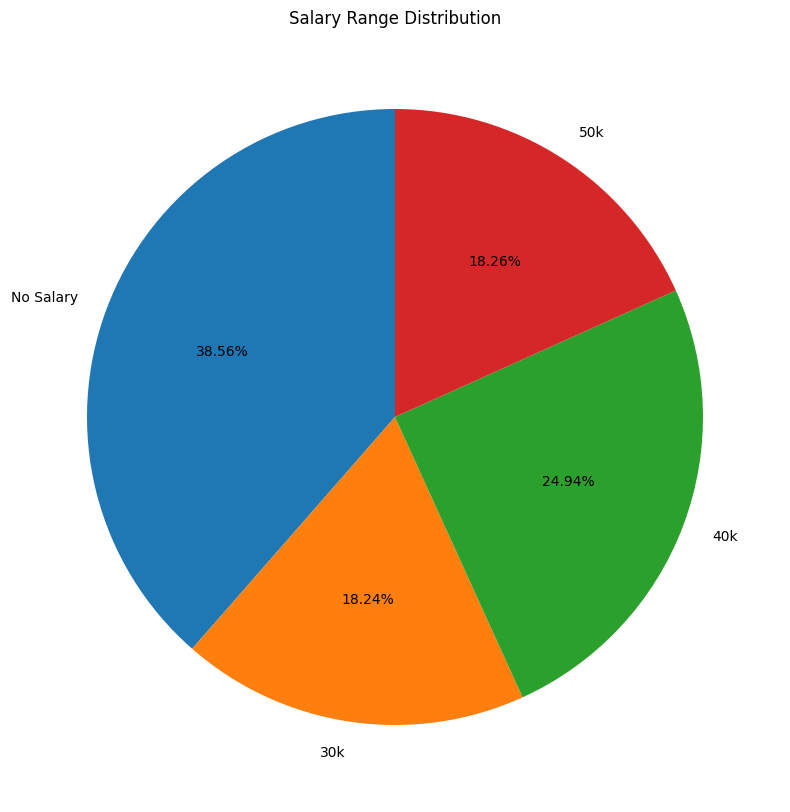

In [7]:
#salary ranges plot
salary_ranges = pd.DataFrame({
    'Label': ['No Salary', '30k', '40k', '50k'],
    'Count': [3894, 1842, 2519, 1844]
})

plt.figure(figsize=(10,10))
plt.pie(salary_ranges['Count'],
        labels=salary_ranges['Label'],
        autopct='%1.2f%%',
        startangle=90)
plt.title('Salary Range Distribution')
plt.show()

In [8]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]

#marketsize = locationDf['Count'].sum()
#print(marketsize)

#locationDf['Share'] = locationDf['Count']/marketsize
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Location,Count
Location,,,,,,,,,,,,,,,
ACT,71,71,71,71,0,71,71,71,71,71,71,71,71,ACT,71
Adelaide,131,131,116,131,0,131,131,131,116,131,131,116,131,Adelaide,131
Adelaide Hills & Barossa,3,3,2,3,0,3,3,3,3,3,3,3,3,Adelaide Hills & Barossa,3
Albany & Great Southern,4,4,4,4,0,4,4,4,4,4,4,4,4,Albany & Great Southern,4
Albury Area,4,4,4,4,0,4,4,4,4,4,4,4,4,Albury Area,4


Text(0.5, 1.0, 'Top 5 Locations + Others Job Market Share')

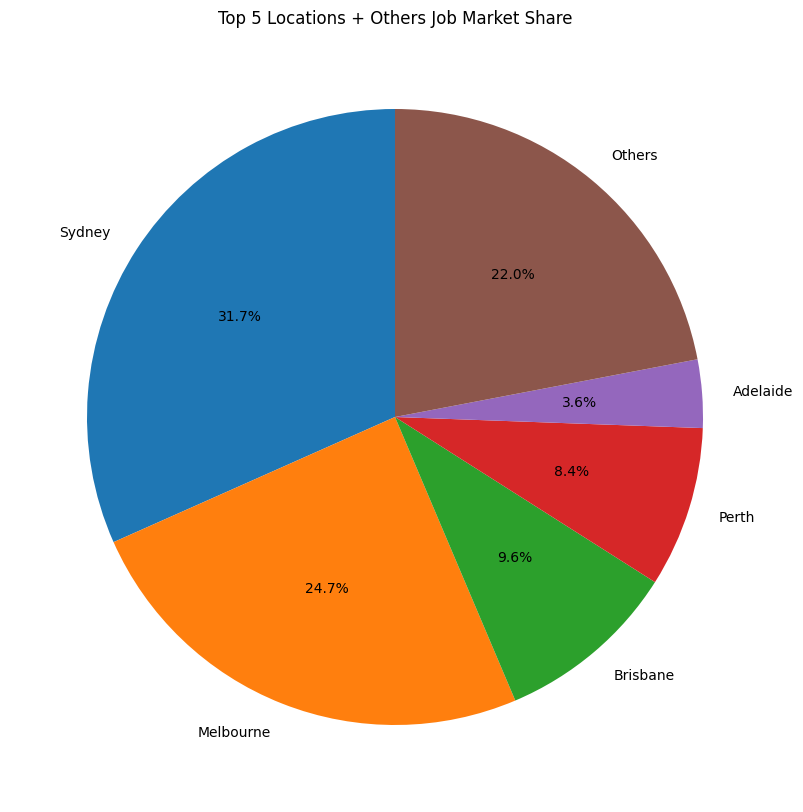

In [11]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

# top 5 locations
top_locations = locationDf.nlargest(5, 'Count')

# other locations
others_count = locationDf['Count'].sum() - top_locations['Count'].sum()

pie_df = pd.DataFrame({
    'Location': top_locations['Location'].tolist() + ['Others'],
    'Count': top_locations['Count'].tolist() + [others_count]
})

plt.figure(figsize=(10,10))
plt.pie(
    pie_df['Count'],
    labels=pie_df['Location'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Top 5 Locations + Others Job Market Share')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
